In [100]:
from utils.player import *
from matplotlib import pyplot as plt
import pandas as pd
import pyarrow.parquet as pa
from textwrap import wrap

Get the player ids

In [101]:
italy = getPlayerInfos(66)
wales = getPlayerInfos(144)

names_map = {}

ids_it, ids_w = [], []
for player in italy:
    ids_it.append(player.id)
    names_map[player.id] = player.name
for player in wales:
    ids_w.append(player.id)
    names_map[player.id] = player.name


In [ ]:
# total, all games
it = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italy.parquet').to_pandas()
it_norm = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italyNorm.parquet').to_pandas()
wal = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/wales.parquet').to_pandas()
wal_norm = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/walesNorm.parquet').to_pandas()

# 1st half, all games
it_1st = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italy_1st.parquet').to_pandas()
it_norm_1st = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italyNorm_1st.parquet').to_pandas()
wal_1st = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/wales_1st.parquet').to_pandas()
wal_norm_1st = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/walesNorm_1st.parquet').to_pandas()


# 2nd half, all games
it_2nd = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italy_2nd.parquet').to_pandas()
it_norm_2nd = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italyNorm_2nd.parquet').to_pandas()
wal_2nd = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/wales_2nd.parquet').to_pandas()
wal_norm_2nd = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/walesNorm_2nd.parquet').to_pandas()

# overtimes
it_otime = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italy_overtime.parquet').to_pandas()
it_norm_otime = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italyNorm_overtime.parquet').to_pandas()
# wal_otime = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/wales_overtime.parquet').to_pandas()
# wal_norm_otime = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/walesNorm_overtime.parquet').to_pandas()

# excl. overtimes
it_90 = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italy_regtime.parquet').to_pandas()
it_norm_90 = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italyNorm_regtime.parquet').to_pandas()
wal_90 = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/wales_regtime.parquet').to_pandas()
wal_norm_90 = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/walesNorm_regtime.parquet').to_pandas()

# both teams before/after the red card
it_bef_red_norm = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italyNorm_before_red.parquet').to_pandas()
it_aft_red_norm = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italyNorm_after_red.parquet').to_pandas()
wal_bef_red_norm = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/walesNorm_before_red.parquet').to_pandas()
wal_aft_red_norm = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/walesNorm_after_red.parquet').to_pandas()

# both teams before/after the goal
it_bef_goal_norm = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italyNorm_before_goal.parquet').to_pandas()
wal_bef_goal_norm = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/walesNorm_before_goal.parquet').to_pandas()

#after the goal -immediate reaction
it_aft_goal_imm_norm = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/italyNorm_after_goal_imm.parquet').to_pandas()
wal_aft_goal_imm_norm = pa.read_table('/home/igor/PycharmProjects/socceranalytics/newDists/walesNorm_after_goal_imm.parquet').to_pandas()

wal

Game running performance - both teams [total]

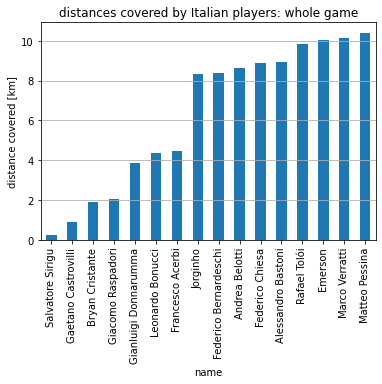

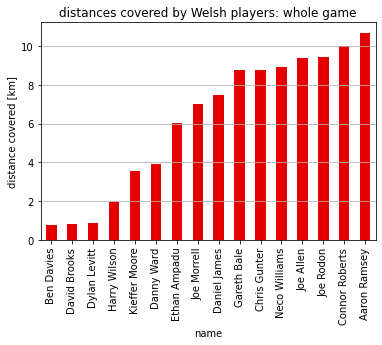

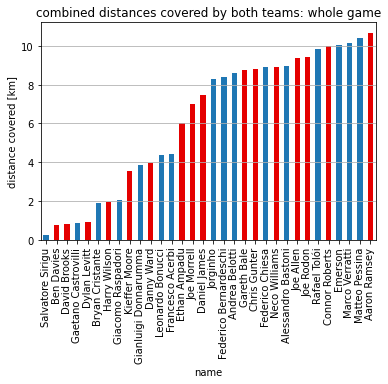

In [103]:
# SAVED

names = pd.DataFrame.from_dict(names_map, orient='index', columns=['name'])

it_game = it.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
wal_game = wal.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)

ax0 = it_game.plot.bar(y='ITA - WAL', x='name', title='distances covered by Italian players: whole game', legend=False, ylabel='distance covered [km]').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_whole_game_total.png', facecolor='white', bbox_inches='tight', dpi=120)
ax1 = wal_game.plot.bar(y='ITA - WAL', x='name', title='distances covered by Welsh players: whole game', legend=False, ylabel='distance covered [km]', color='#e50000').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_whole_game_total.png', facecolor='white', bbox_inches='tight', dpi=120)

game = pd.concat([it, wal], join='inner').join(names).sort_values(by=['ITA - WAL']).dropna()

ax2 = game.plot.bar(y='ITA - WAL', x='name', title='combined distances covered by both teams: whole game', legend=False, xlabel=None, ylabel = 'distance covered [km]')
plt.grid(axis='y')


for p in ids_w:
  if p in game.index:
    pos = game.index.get_loc(p)
    ax2.patches[pos].set_facecolor('#e50000')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy-wales/it-wal_whole_game_total.png', facecolor='white', bbox_inches='tight', dpi=120)

same as above, but for 1st and 2nd half separately

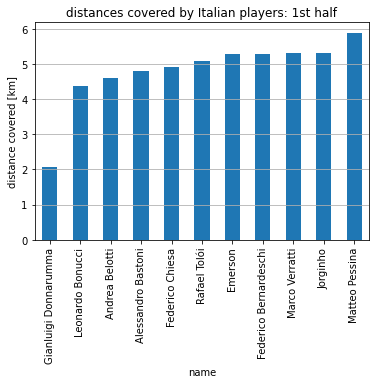

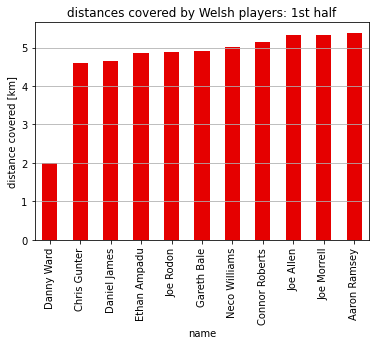

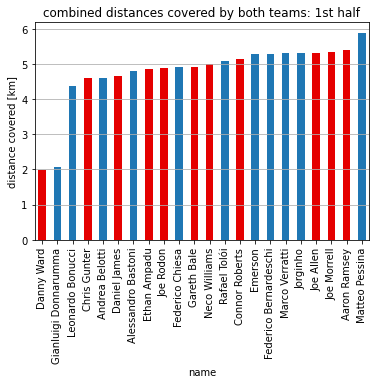

In [104]:
# SAVED

names = pd.DataFrame.from_dict(names_map, orient='index', columns=['name'])

it_game = it_1st.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
wal_game = wal_1st.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)

ax0 = it_game.plot.bar(y='ITA - WAL', x='name', title='distances covered by Italian players: 1st half', legend=False, ylabel='distance covered [km]').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_1st_half_total.png', facecolor='white', bbox_inches='tight', dpi=120)
ax1 = wal_game.plot.bar(y='ITA - WAL', x='name', title='distances covered by Welsh players: 1st half', legend=False, ylabel='distance covered [km]', color='#e50000').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_1st_half_total.png', facecolor='white', bbox_inches='tight', dpi=120)
game = pd.concat([it_1st, wal_1st], join='inner').join(names).sort_values(by=['ITA - WAL']).dropna()

ax2 = game.plot.bar(y='ITA - WAL', x='name', title='combined distances covered by both teams: 1st half', legend=False, xlabel=None, ylabel = 'distance covered [km]')
plt.grid(axis='y')


for p in ids_w:
  if p in game.index:
    pos = game.index.get_loc(p)
    ax2.patches[pos].set_facecolor('#e50000')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy-wales/it-wal_1st_half_total.png', facecolor='white', bbox_inches='tight', dpi=120)

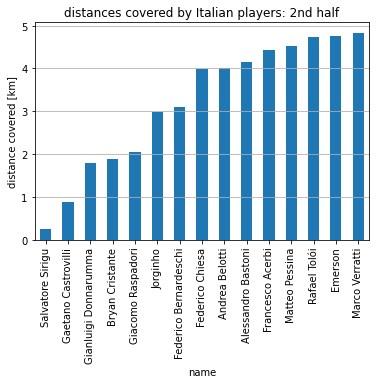

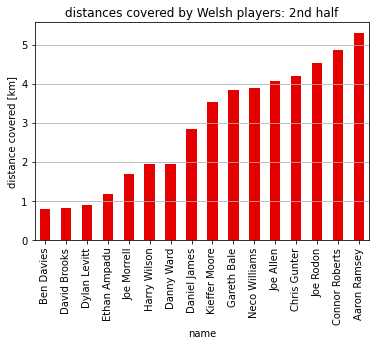

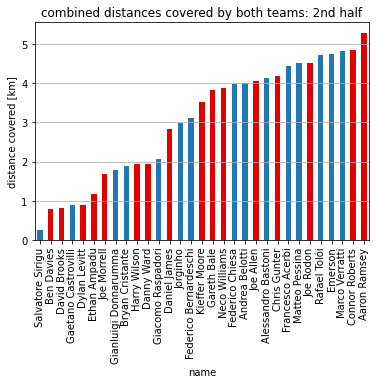

In [105]:
# SAVED

names = pd.DataFrame.from_dict(names_map, orient='index', columns=['name'])

it_game = it_2nd.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
wal_game = wal_2nd.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)

ax0 = it_game.plot.bar(y='ITA - WAL', x='name', title='distances covered by Italian players: 2nd half', legend=False, ylabel='distance covered [km]').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_2nd_half_total.png', facecolor='white', bbox_inches='tight', dpi=120)
ax1 = wal_game.plot.bar(y='ITA - WAL', x='name', title='distances covered by Welsh players: 2nd half', legend=False, ylabel='distance covered [km]', color='#e50000').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_2nd_half_total.png', facecolor='white', bbox_inches='tight', dpi=120)
game = pd.concat([it_2nd, wal_2nd], join='inner').join(names).sort_values(by=['ITA - WAL']).dropna()

ax2 = game.plot.bar(y='ITA - WAL', x='name', title='combined distances covered by both teams: 2nd half', legend=False, xlabel=None, ylabel = 'distance covered [km]')
plt.grid(axis='y')


for p in ids_w:
  if p in game.index:
    pos = game.index.get_loc(p)
    ax2.patches[pos].set_facecolor('#e50000')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy-wales/it-wal_2nd_half_total.png', facecolor='white', bbox_inches='tight', dpi=120)

Game running performance - both teams [total, normalized] - the result might by slightly misleading due to the players who got subbed on & played only for the moments when they had energy -> put normalized results for first half and second half to show it

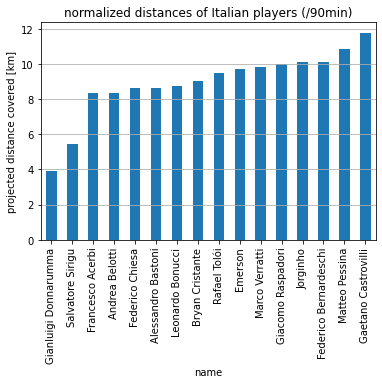

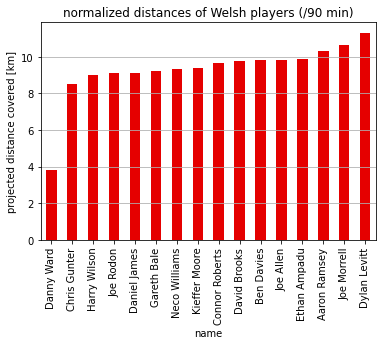

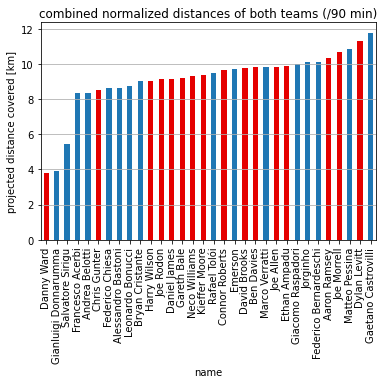

In [106]:
# SAVED

names = pd.DataFrame.from_dict(names_map, orient='index', columns=['name'])

it_game = it_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
wal_game = wal_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)

ax0 = it_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Italian players (/90min)', legend=False, ylabel='projected distance covered [km]').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_whole_game_norm.png', facecolor='white', bbox_inches='tight', dpi=120)
ax1 = wal_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Welsh players (/90 min)', legend=False, ylabel='projected distance covered [km]', color='#e50000').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_whole_game_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

game = pd.concat([it_norm, wal_norm], join='inner').join(names).sort_values(by=['ITA - WAL']).dropna()

ax = game.plot.bar(y='ITA - WAL', x='name', title='combined normalized distances of both teams (/90 min)', legend=False, ylabel = 'projected distance covered [km]')
plt.grid(axis='y')

for p in ids_w:
  if p in game.index:
    pos = game.index.get_loc(p)
    ax.patches[pos].set_facecolor('#e50000')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy-wales/it-wal_whole_game_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

Same as above, but for 1st and 2nd half separately:

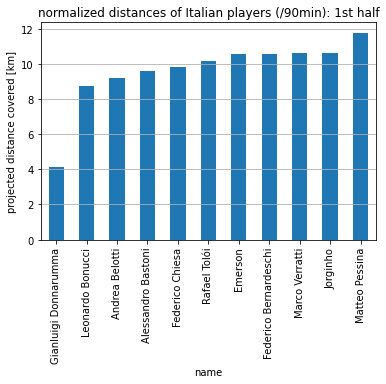

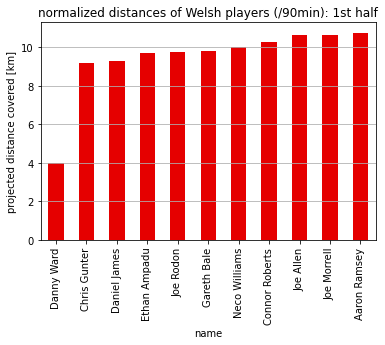

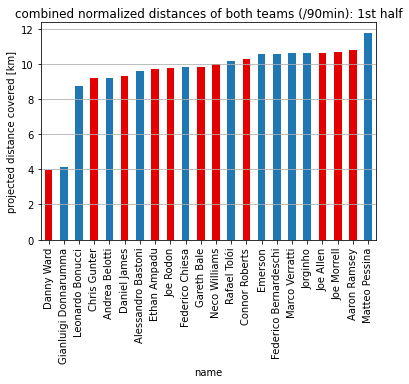

In [107]:
# SAVED

names = pd.DataFrame.from_dict(names_map, orient='index', columns=['name'])

# 1st half only
it_game = it_norm_1st.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
wal_game = wal_norm_1st.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)

ax0 = it_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Italian players (/90min): 1st half', legend=False, ylabel='projected distance covered [km]').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_1st_half_norm.png', facecolor='white', bbox_inches='tight', dpi=120)
ax1 = wal_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Welsh players (/90min): 1st half', legend=False, ylabel='projected distance covered [km]', color='#e50000').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_1st_half_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

game = pd.concat([it_norm_1st, wal_norm_1st], join='inner').join(names).sort_values(by=['ITA - WAL']).dropna()

ax = game.plot.bar(y='ITA - WAL', x='name', title='combined normalized distances of both teams (/90min): 1st half', legend=False, ylabel = 'projected distance covered [km]')
plt.grid(axis='y')

for p in ids_w:
  if p in game.index:
    pos = game.index.get_loc(p)
    ax.patches[pos].set_facecolor('#e50000')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy-wales/it-wal_1st_half_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

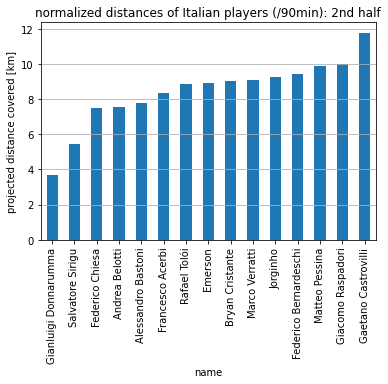

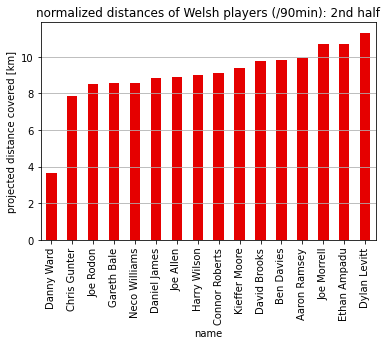

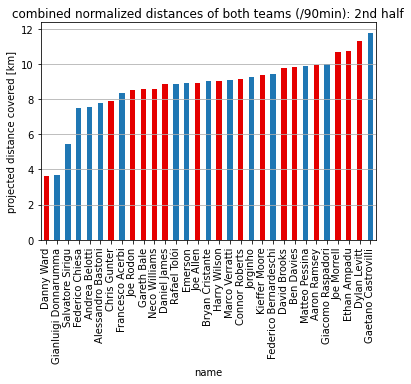

In [108]:
# SAVED

names = pd.DataFrame.from_dict(names_map, orient='index', columns=['name'])

# 1st half only
it_game = it_norm_2nd.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
wal_game = wal_norm_2nd.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)

ax0 = it_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Italian players (/90min): 2nd half', legend=False, ylabel='projected distance covered [km]').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_2nd_half_norm.png', facecolor='white', bbox_inches='tight', dpi=120)
ax1 = wal_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Welsh players (/90min): 2nd half', legend=False, ylabel='projected distance covered [km]', color='#e50000').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_2nd_half_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

game = pd.concat([it_norm_2nd, wal_norm_2nd], join='inner').join(names).sort_values(by=['ITA - WAL']).dropna()

ax = game.plot.bar(y='ITA - WAL', x='name', title='combined normalized distances of both teams (/90min): 2nd half', legend=False, ylabel = 'projected distance covered [km]')
plt.grid(axis='y')

for p in ids_w:
  if p in game.index:
    pos = game.index.get_loc(p)
    ax.patches[pos].set_facecolor('#e50000')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy-wales/it-wal_2nd_half_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

normalized performance before/after the goal

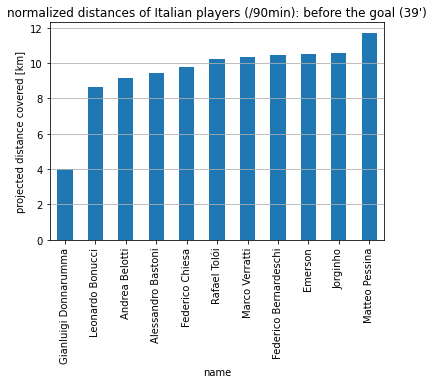

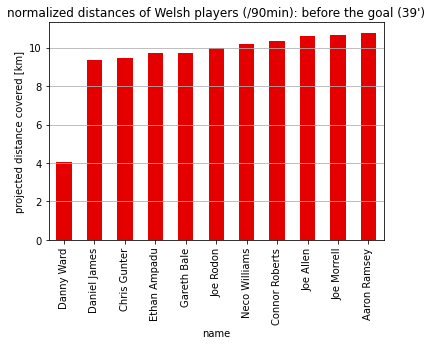

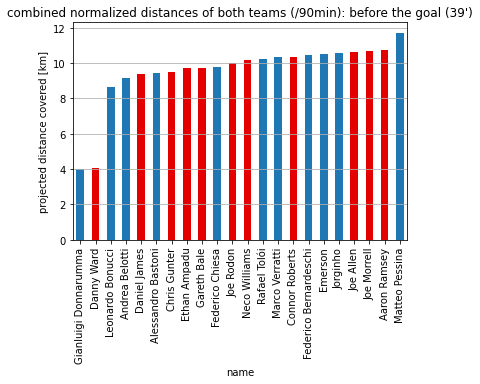

In [109]:
# SAVED

# before the goal

names = pd.DataFrame.from_dict(names_map, orient='index', columns=['name'])

# 1st half only
it_game = it_bef_goal_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
wal_game = wal_bef_goal_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)

ax0 = it_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Italian players (/90min): before the goal (39\')', legend=False, ylabel='projected distance covered [km]').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_bef_goal_norm.png', facecolor='white', bbox_inches='tight', dpi=120)
ax1 = wal_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Welsh players (/90min): before the goal (39\')', legend=False, ylabel='projected distance covered [km]', color='#e50000').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_bef_goal_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

game = pd.concat([it_bef_goal_norm, wal_bef_goal_norm], join='inner').join(names).sort_values(by=['ITA - WAL']).dropna()

ax = game.plot.bar(y='ITA - WAL', x='name', title='combined normalized distances of both teams (/90min): before the goal (39\')', legend=False, ylabel = 'projected distance covered [km]')
plt.grid(axis='y')

for p in ids_w:
  if p in game.index:
    pos = game.index.get_loc(p)
    ax.patches[pos].set_facecolor('#e50000')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy-wales/it-wal_bef_goal_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

In [110]:
# # SAVED
#
# # after the goal
#
# names = pd.DataFrame.from_dict(names_map, orient='index', columns=['name'])
#
# # 1st half only
# it_game = it_aft_goal_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
# wal_game = wal_aft_goal_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
#
# ax0 = it_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Italian players (/90min): after the goal (39\')', legend=False, ylabel='projected distance covered [km]').grid(axis='y')
# plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_aft_goal_norm.png', facecolor='white', bbox_inches='tight', dpi=120, dpi=300)
# ax1 = wal_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Welsh players (/90min): after the goal (39\')', legend=False, ylabel='projected distance covered [km]', color='#e50000').grid(axis='y')
# plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_aft_goal_norm.png', facecolor='white', bbox_inches='tight', dpi=120, dpi=300)
#
# game = pd.concat([it_aft_goal_norm, wal_aft_goal_norm], join='inner').join(names).sort_values(by=['ITA - WAL']).dropna()
#
# ax = game.plot.bar(y='ITA - WAL', x='name', title='combined normalized distances of both teams (/90min): after the goal (39\')', legend=False, ylabel = 'projected distance covered [km]')
# plt.grid(axis='y')
#
# for p in ids_w:
#   if p in game.index:
#     pos = game.index.get_loc(p)
#     ax.patches[pos].set_facecolor('#e50000')
#
# plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy-wales/it-wal_aft_goal_norm.png', facecolor='white', bbox_inches='tight', dpi=120, dpi=300)

after the goal - immediate reaction 39-45

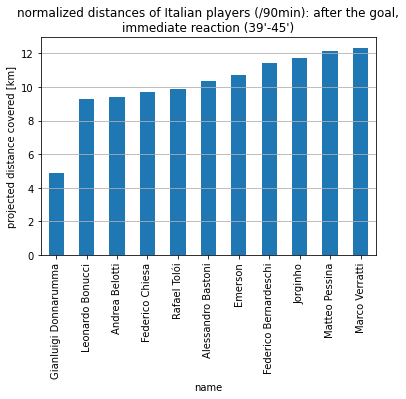

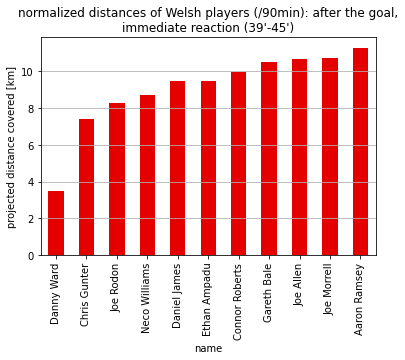

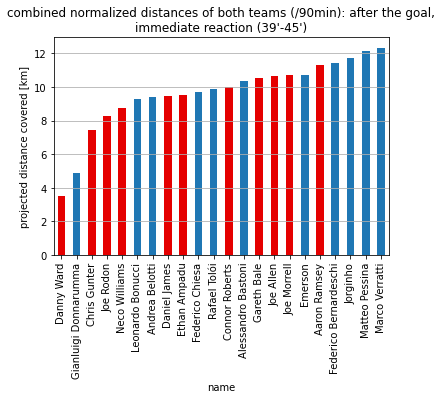

In [111]:
# SAVED

# after the goal

names = pd.DataFrame.from_dict(names_map, orient='index', columns=['name'])

# 1st half only
it_game = it_aft_goal_imm_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
wal_game = wal_aft_goal_imm_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)

ax0 = it_game.plot.bar(y='ITA - WAL', x='name', title='\n'.join(wrap('normalized distances of Italian players (/90min): after the goal, immediate reaction (39\'-45\')')), legend=False, ylabel='projected distance covered [km]').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_aft_goal_imm_norm.png', facecolor='white', bbox_inches='tight', dpi=120)
ax1 = wal_game.plot.bar(y='ITA - WAL', x='name', title='\n'.join(wrap('normalized distances of Welsh players (/90min): after the goal, immediate reaction (39\'-45\')')), legend=False, ylabel='projected distance covered [km]', color='#e50000').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_aft_goal_imm_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

game = pd.concat([it_aft_goal_imm_norm, wal_aft_goal_imm_norm], join='inner').join(names).sort_values(by=['ITA - WAL']).dropna()

ax = game.plot.bar(y='ITA - WAL', x='name', title='\n'.join(wrap('combined normalized distances of both teams (/90min): after the goal, immediate reaction (39\'-45\')')), legend=False, ylabel = 'projected distance covered [km]')
plt.grid(axis='y')

for p in ids_w:
  if p in game.index:
    pos = game.index.get_loc(p)
    ax.patches[pos].set_facecolor('#e50000')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy-wales/it-wal_aft_goal_imm_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

normalized performance before/after the red card

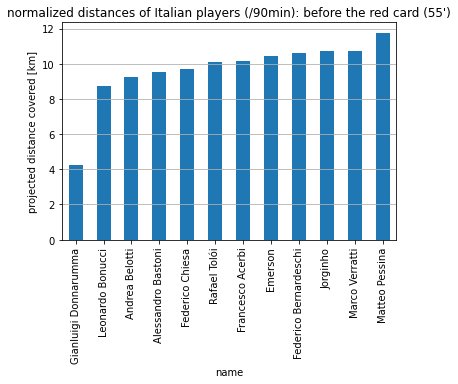

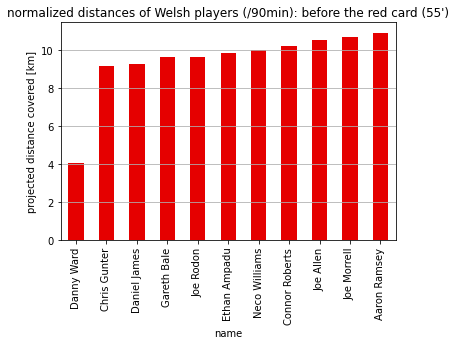

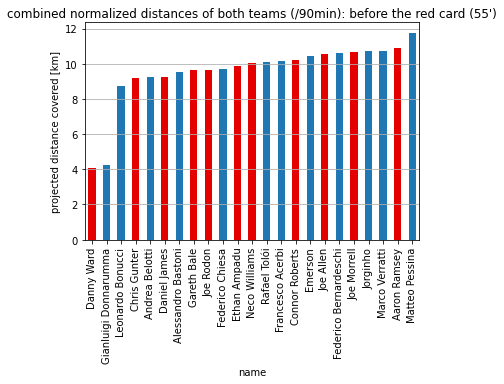

In [112]:
# SAVED

# before the red card

names = pd.DataFrame.from_dict(names_map, orient='index', columns=['name'])

# 1st half only
it_game = it_bef_red_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
wal_game = wal_bef_red_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)

ax0 = it_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Italian players (/90min): before the red card (55\')', legend=False, ylabel='projected distance covered [km]').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_bef_red_norm.png', facecolor='white', bbox_inches='tight', dpi=120)
ax1 = wal_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Welsh players (/90min): before the red card (55\')', legend=False, ylabel='projected distance covered [km]', color='#e50000').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_bef_red_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

game = pd.concat([it_bef_red_norm, wal_bef_red_norm], join='inner').join(names).sort_values(by=['ITA - WAL']).dropna()

ax = game.plot.bar(y='ITA - WAL', x='name', title='combined normalized distances of both teams (/90min): before the red card (55\')', legend=False, ylabel = 'projected distance covered [km]')
plt.grid(axis='y')

for p in ids_w:
  if p in game.index:
    pos = game.index.get_loc(p)
    ax.patches[pos].set_facecolor('#e50000')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy-wales/it-wal_bef_red_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

Italy's running performance - tournament

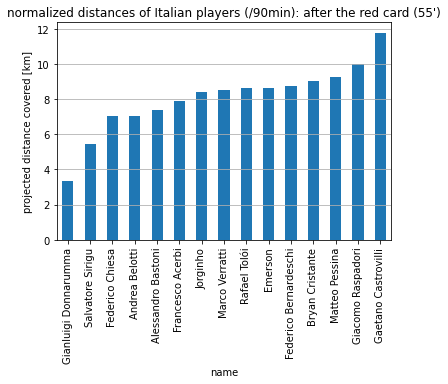

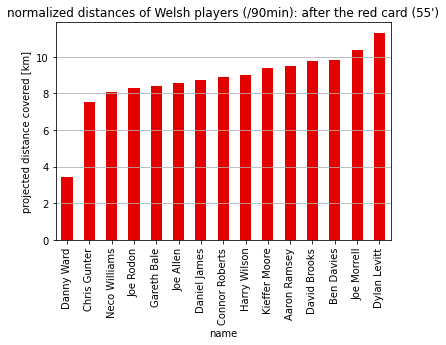

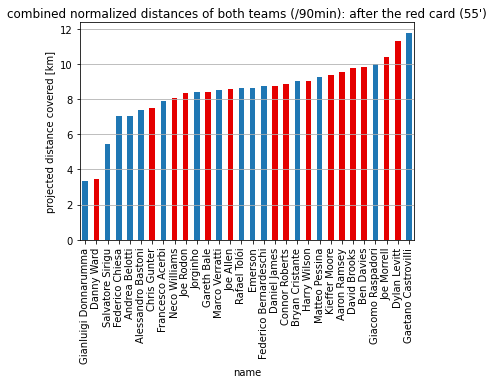

In [113]:
# SAVED

# after the red card

names = pd.DataFrame.from_dict(names_map, orient='index', columns=['name'])

# 1st half only
it_game = it_aft_red_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)
wal_game = wal_aft_red_norm.loc[:, ['ITA - WAL']].sort_values(by=['ITA - WAL']).dropna().join(names)

ax0 = it_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Italian players (/90min): after the red card (55\')', legend=False, ylabel='projected distance covered [km]').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_aft_red_norm.png', facecolor='white', bbox_inches='tight', dpi=120)
ax1 = wal_game.plot.bar(y='ITA - WAL', x='name', title='normalized distances of Welsh players (/90min): after the red card (55\')', legend=False, ylabel='projected distance covered [km]', color='#e50000').grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_aft_red_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

game = pd.concat([it_aft_red_norm, wal_aft_red_norm], join='inner').join(names).sort_values(by=['ITA - WAL']).dropna()

ax = game.plot.bar(y='ITA - WAL', x='name', title='combined normalized distances of both teams (/90min): after the red card (55\')', legend=False, ylabel = 'projected distance covered [km]')
plt.grid(axis='y')

for p in ids_w:
  if p in game.index:
    pos = game.index.get_loc(p)
    ax.patches[pos].set_facecolor('#e50000')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy-wales/it-wal_aft_red_norm.png', facecolor='white', bbox_inches='tight', dpi=120)

In [ ]:
# SAVED

# total running performance

total_sorted = round(it[it.columns[0:]].sum().sort_values(),1)
print(total_sorted)
total_sorted = total_sorted[['TUR - ITA', 'ITA - SWI', 'ITA - WAL', 'ITA - AUS', 'BEL - ITA', 'ITA - SPA', 'ITA - ENG']]

ax = total_sorted.plot.bar(title='Italy\'s running performance throughout the tournament', ylabel='team\'s distance covered [km]')

highlight = 'ITA - WAL'
pos = total_sorted.index.get_loc(highlight)

ax.patches[pos].set_facecolor('#ffd700')

plt.grid(axis='y')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_tournament_total.png', facecolor='white', bbox_inches='tight', dpi=120)

In [ ]:
# SAVED

# 1st half only - running performance

total_sorted = round(it_1st[it_1st.columns[0:]].sum().sort_values(),1)
print(total_sorted)
total_sorted = total_sorted[['TUR - ITA', 'ITA - SWI', 'ITA - WAL', 'ITA - AUS', 'BEL - ITA', 'ITA - SPA', 'ITA - ENG']]

ax = total_sorted.plot.bar(title='Italy\'s running performance throughout the tournament: 1st half', ylabel='team\'s distance covered [km]')

highlight = 'ITA - WAL'
pos = total_sorted.index.get_loc(highlight)

ax.patches[pos].set_facecolor('#ffd700')

plt.grid(axis='y')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_tournament_1st_half.png', facecolor='white', bbox_inches='tight', dpi=120)

In [ ]:
# SAVED

# 2nd half only - running performance

total_sorted = round(it_2nd[it_2nd.columns[0:]].sum().sort_values(),1)
print(total_sorted)
total_sorted = total_sorted[['TUR - ITA', 'ITA - SWI', 'ITA - WAL', 'ITA - AUS', 'BEL - ITA', 'ITA - SPA', 'ITA - ENG']]

ax = total_sorted.plot.bar(title='Italy\'s running performance throughout the tournament: 2nd half', ylabel='team\'s distance covered [km]')

highlight = 'ITA - WAL'
pos = total_sorted.index.get_loc(highlight)

ax.patches[pos].set_facecolor('#ffd700')

plt.grid(axis='y')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_tournament_2nd_half.png', facecolor='white', bbox_inches='tight', dpi=120)

In [ ]:
# SAVED

# overtime only running performance

total_sorted = it_otime[it_otime.columns[0:]].sum().sort_values().map(lambda x: round(x, 1))
print(total_sorted)
total_sorted=total_sorted[['TUR - ITA', 'ITA - SWI', 'ITA - WAL', 'ITA - AUS', 'BEL - ITA', 'ITA - SPA', 'ITA - ENG']]

ax = total_sorted.plot.bar(title='Italy\'s running performance throughout the tournament: overtimes', ylabel='team\'s distance covered [km]')

highlight = 'ITA - WAL'
pos = total_sorted.index.get_loc(highlight)

ax.patches[pos].set_facecolor('#ffd700')

plt.grid(axis='y')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_tournament_overtime.png', facecolor='white', bbox_inches='tight', dpi=120)

In [ ]:
# SAVED

# no overtimes performance

total_sorted = round(it_90[it_90.columns[0:]].sum().sort_values(),1)
total_sorted=total_sorted[['TUR - ITA', 'ITA - SWI', 'ITA - WAL', 'ITA - AUS', 'BEL - ITA', 'ITA - SPA', 'ITA - ENG']]

print(total_sorted)

ax = total_sorted.plot.bar(title='Italy\'s running performance throughout the tournament: excl. overtimes', ylabel='team\'s distance covered [km]')

highlight = 'ITA - WAL'
pos = total_sorted.index.get_loc(highlight)

ax.patches[pos].set_facecolor('#ffd700')

plt.grid(axis='y')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/team/it_tournament_reg_time.png', facecolor='white', bbox_inches='tight', dpi=120)

Wales' running performance - tournament

In [ ]:
# SAVED

total_sorted = round(wal[wal.columns[0:]].sum().sort_values(),1)
total_sorted=total_sorted[['WAL - SWI', 'TUR - WAL', 'ITA - WAL', 'WAL - DEN']]
print(total_sorted)


ax = total_sorted.plot.bar(title='Wales\' running performance throughout the tournament', color='#e50000', ylabel='team\'s distance covered [km]')
highlight = 'ITA - WAL'
pos = total_sorted.index.get_loc(highlight)
ax.patches[pos].set_facecolor('#ffd700')

plt.grid(axis='y')
plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_tournament_total.png', facecolor='white', bbox_inches='tight', dpi=120)

In [ ]:
# SAVED

# 1st half only - running performance

total_sorted = round(wal_1st[wal_1st.columns[0:]].sum().sort_values(),1)
print(total_sorted)
total_sorted=total_sorted[['WAL - SWI', 'TUR - WAL', 'ITA - WAL', 'WAL - DEN']]

ax = total_sorted.plot.bar(title='Wales\'s running performance throughout the tournament: 1st half', ylabel='team\'s distance covered [km]', color='#e50000')

highlight = 'ITA - WAL'
pos = total_sorted.index.get_loc(highlight)

ax.patches[pos].set_facecolor('#ffd700')

plt.grid(axis='y')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_tournament_1st_half.png', facecolor='white', bbox_inches='tight', dpi=120)

In [ ]:
# SAVED

# 2nd half only - running performance

total_sorted = round(wal_2nd[wal_2nd.columns[0:]].sum().sort_values(),1)
print(total_sorted)

total_sorted=total_sorted[['WAL - SWI', 'TUR - WAL', 'ITA - WAL', 'WAL - DEN']]

ax = total_sorted.plot.bar(title='Wales\'s running performance throughout the tournament: 2nd half', ylabel='team\'s distance covered [km]', color='#e50000')

highlight = 'ITA - WAL'
pos = total_sorted.index.get_loc(highlight)

ax.patches[pos].set_facecolor('#ffd700')

plt.grid(axis='y')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_tournament_2nd_half.png', facecolor='white', bbox_inches='tight', dpi=120)

In [122]:
# # SAVED
#
# # overtime only running performance
#
# total_sorted = wal_otime[wal_otime.columns[0:]].sum().sort_values().map(lambda x: round(x, 1))
# print(total_sorted)
#
# total_sorted=total_sorted[['WAL - SWI', 'TUR - WAL', 'ITA - WAL', 'WAL - DEN']]
#
# ax = total_sorted.plot.bar(title='Wales\'s running performance throughout the tournament: overtimes', ylabel='team\'s distance covered [km]', color='#e50000')
#
# highlight = 'ITA - WAL'
# pos = total_sorted.index.get_loc(highlight)
#
# ax.patches[pos].set_facecolor('#ffd700')
#
# plt.grid(axis='y')
#
# plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_tournament_overtime.png', facecolor='white', bbox_inches='tight', dpi=120)

In [ ]:
# SAVED

# no overtimes performance

total_sorted = round(wal_90[wal_90.columns[0:]].sum().sort_values(),1)

print(total_sorted)

total_sorted=total_sorted[['WAL - SWI', 'TUR - WAL', 'ITA - WAL', 'WAL - DEN']]

ax = total_sorted.plot.bar(title='Wales\'s running performance throughout the tournament: excl. overtimes', ylabel='team\'s distance covered [km]', color='#e50000')

highlight = 'ITA - WAL'
pos = total_sorted.index.get_loc(highlight)

ax.patches[pos].set_facecolor('#ffd700')

plt.grid(axis='y')

plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/team/wal_tournament_reg_time.png', facecolor='white', bbox_inches='tight', dpi=120)

Italy's players running performance throughout the tournament [total] (not really informative)

In [124]:
# highlight = 'ITA - WAL'
# for p in italy:
#   p_running = it.loc[p.id].sort_values()
#
#   ax = p_running.plot(kind='bar', title=('Running performance (total): ' + p.name), ylabel='distance covered [km]')
#   pos = p_running.index.get_loc(highlight)
#   ax.patches[pos].set_facecolor('#ffd700')
#   plt.grid(axis='y')
#   plt.show()

Italy's players running performance throughout the tournament [normalized]

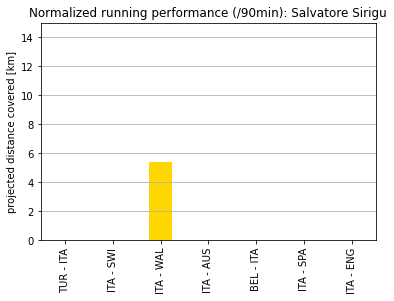

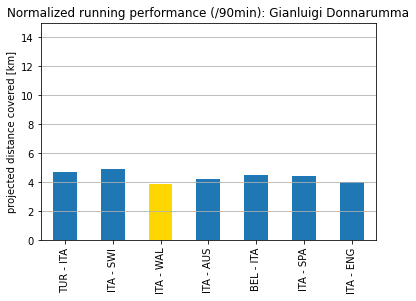

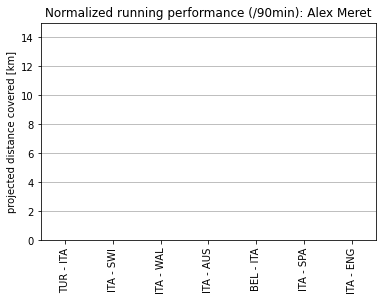

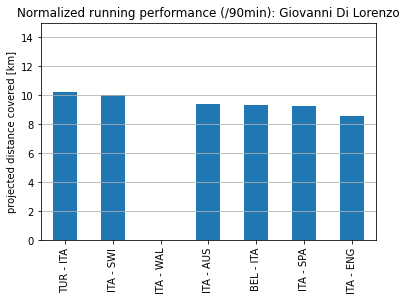

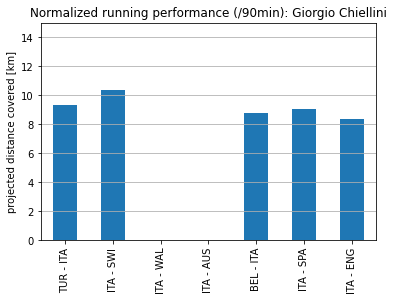

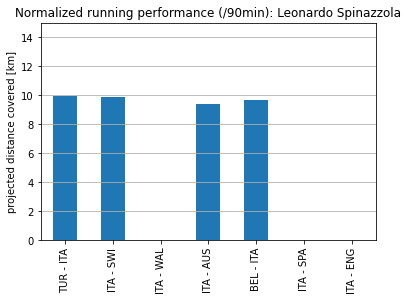

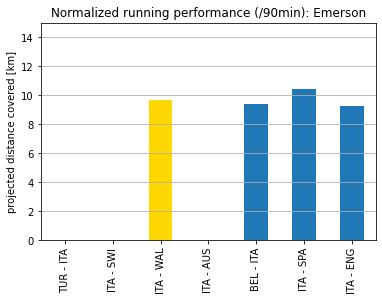

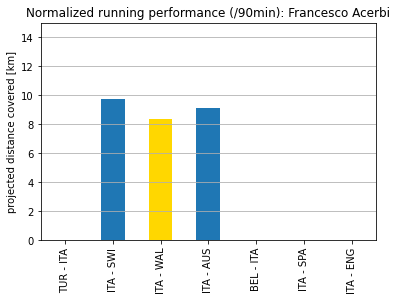

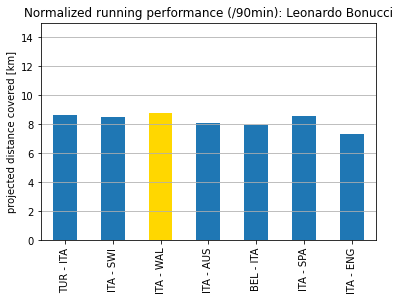

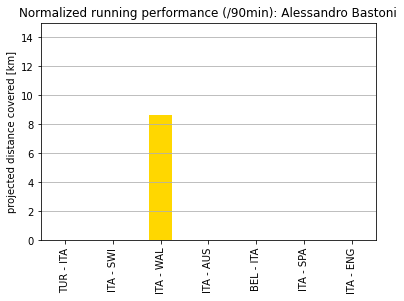

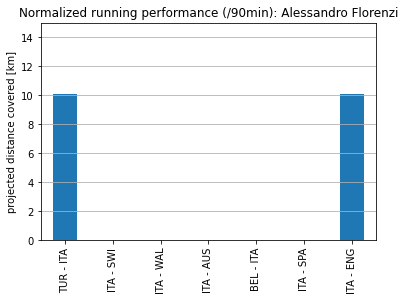

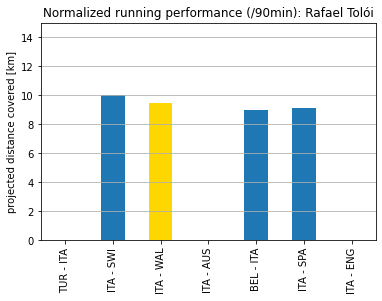

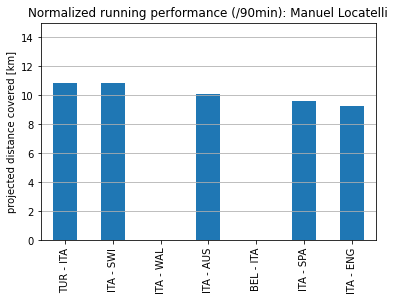

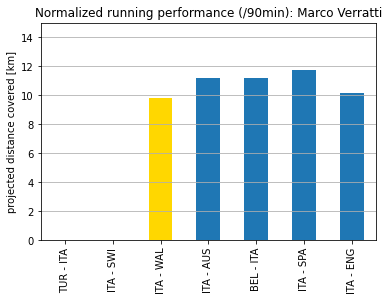

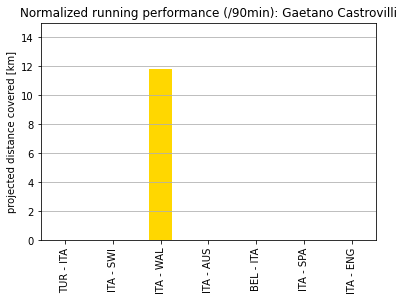

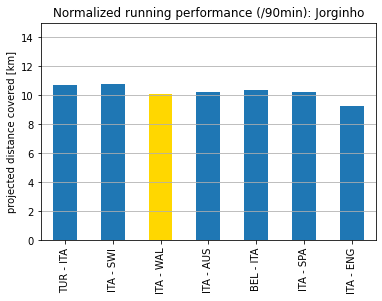

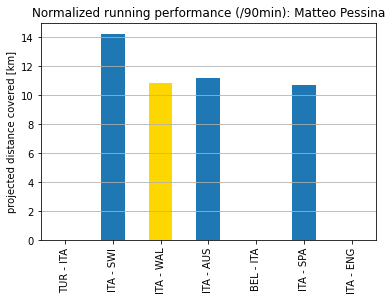

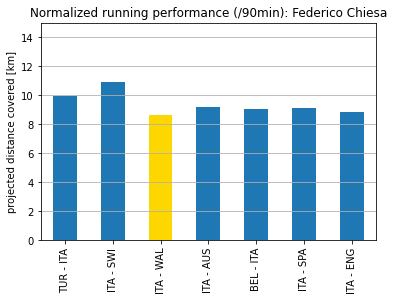

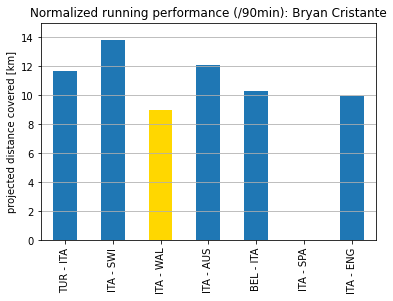

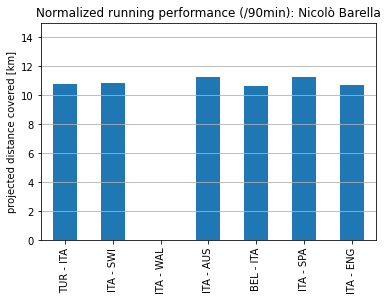

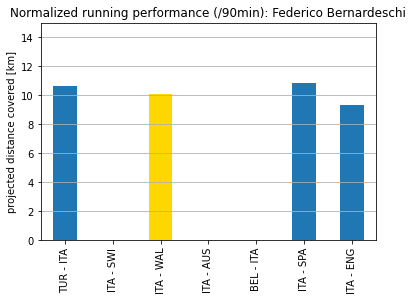

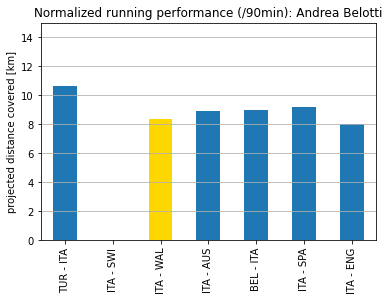

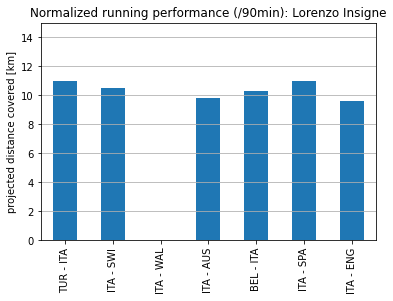

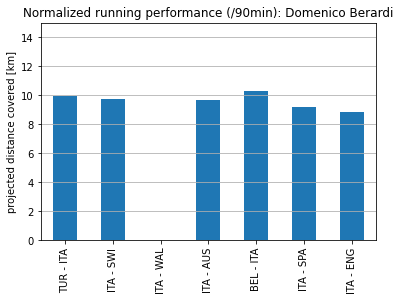

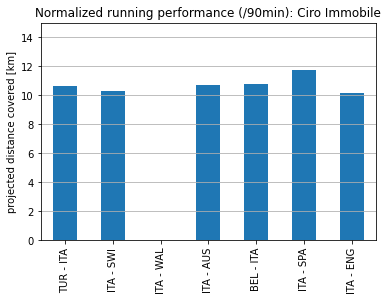

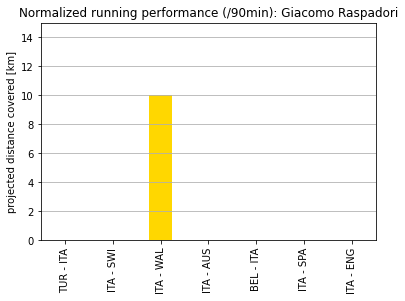

In [125]:
import numpy as np

# SAVED

highlight = 'ITA - WAL'
for p in italy:

  p_running = it.loc[p.id].sort_values()
  p_runningNorm = it_norm.loc[p.id].sort_values()

  p_runningNorm = p_runningNorm[['TUR - ITA', 'ITA - SWI', 'ITA - WAL', 'ITA - AUS', 'BEL - ITA', 'ITA - SPA', 'ITA - ENG']]
  
  

  ax = p_runningNorm.plot(kind='bar', title=('Normalized running performance (/90min): ' + p.name), ylabel='projected distance covered [km]')
  pos = p_runningNorm.index.get_loc(highlight)
  ax.patches[pos].set_facecolor('#ffd700')
  plt.ylim([0,15])
  plt.grid(axis='y')
  plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/italy/players/' + p.name.replace(' ','_') + '_tour_norm.png', facecolor='white', bbox_inches='tight', dpi=120)
  plt.show()

Wales's players running performance throughout the tournament [normalized]

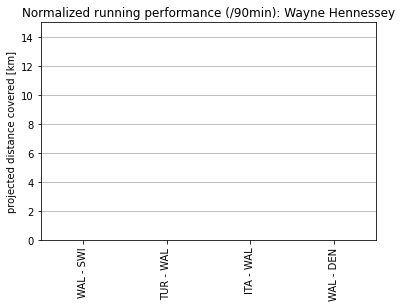

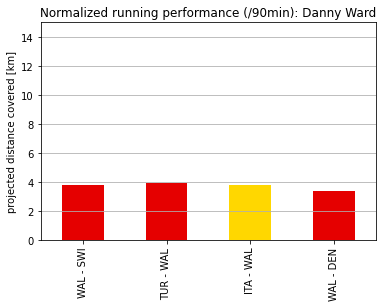

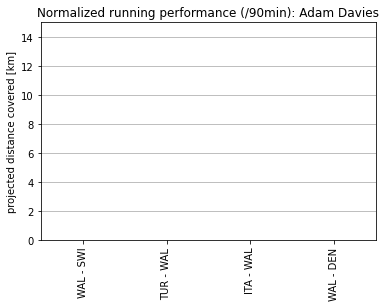

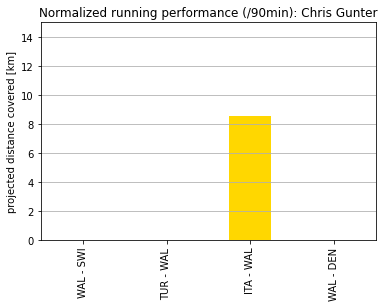

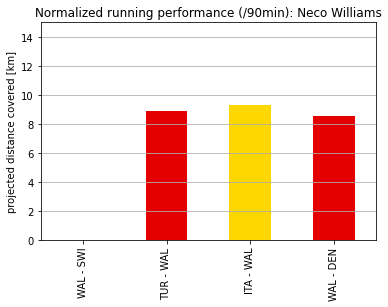

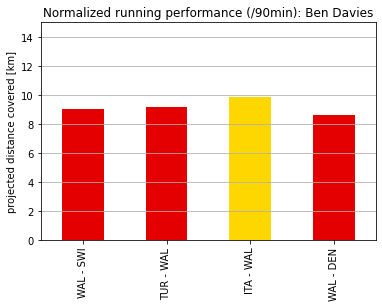

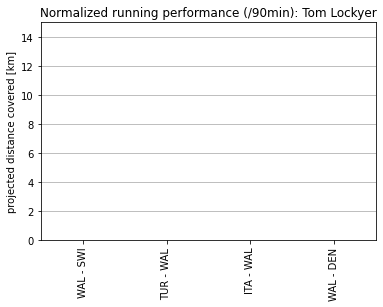

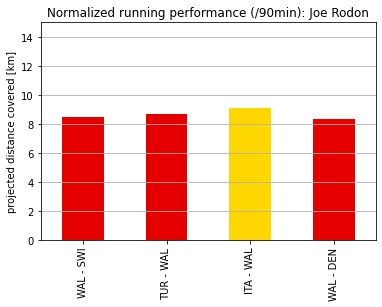

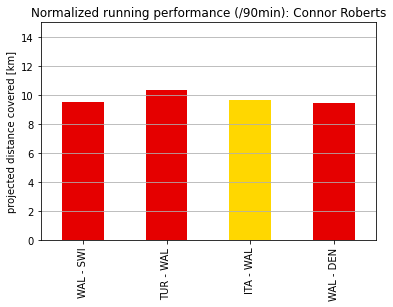

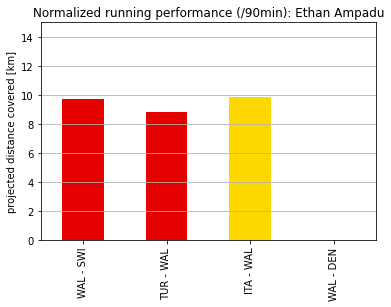

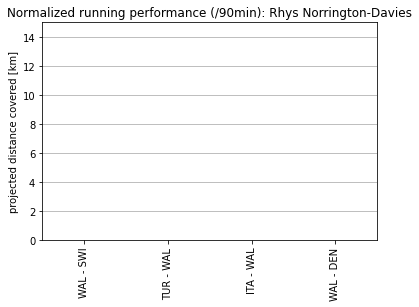

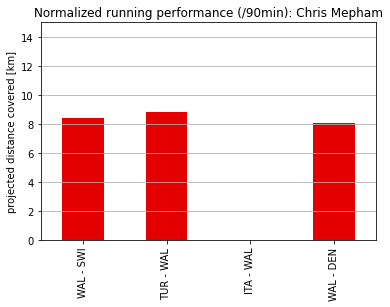

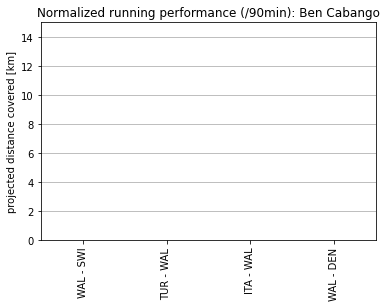

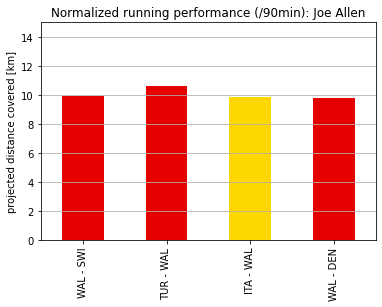

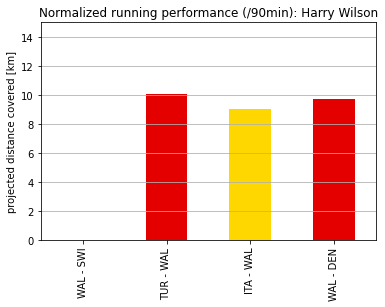

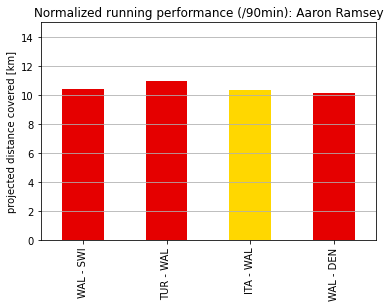

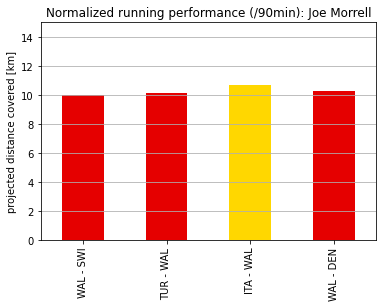

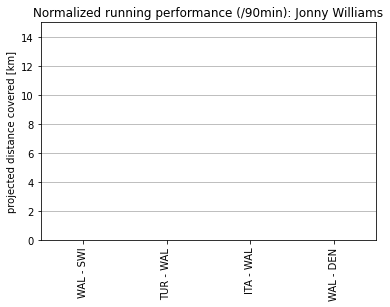

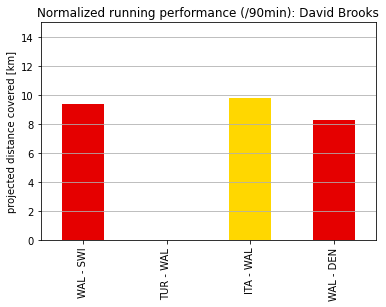

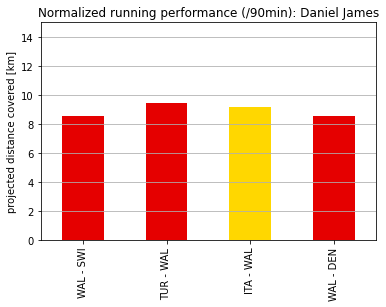

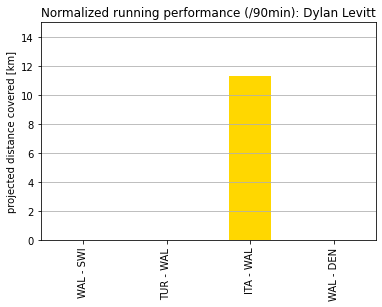

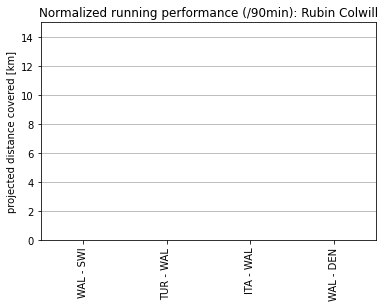

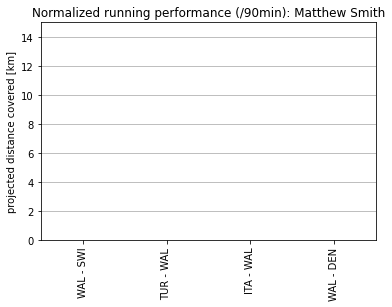

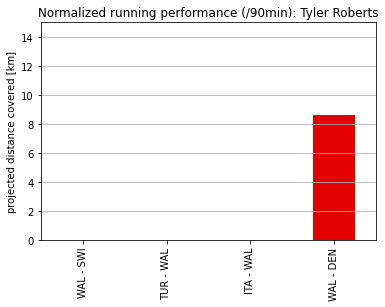

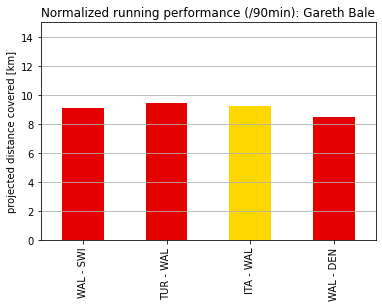

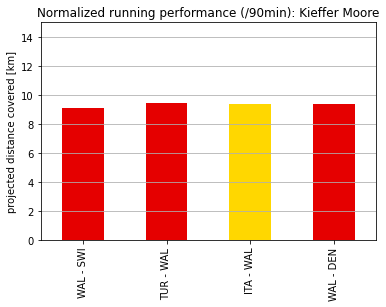

In [126]:
# SAVED

highlight = 'ITA - WAL'
for p in wales:
  # if 'Chiesa' in p.name:
  #   id = p.id

  p_running = wal.loc[p.id].sort_values()
  p_runningNorm = wal_norm.loc[p.id].sort_values()
  p_runningNorm=p_runningNorm[['WAL - SWI', 'TUR - WAL', 'ITA - WAL', 'WAL - DEN']]
  

  ax = p_runningNorm.plot(kind='bar', title=('Normalized running performance (/90min): ' + p.name), color='#e50000', ylabel='projected distance covered [km]')
  pos = p_runningNorm.index.get_loc(highlight)
  ax.patches[pos].set_facecolor('#ffd700')
  plt.ylim([0,15])
  plt.grid(axis='y')
  plt.savefig('/home/igor/PycharmProjects/socceranalytics/new_running_plots/wales/players/' + p.name.replace(' ', '_') + '_tournament_norm.png', facecolor='white', bbox_inches='tight', dpi=120)
  plt.show()